In [76]:
import csv


In [77]:
filename='C:/Users/chero/Documents/covid/owid-covid-data.csv'


In [78]:
import pandas as pd

In [79]:
data = pd.read_csv(filename)

In [80]:
new_df= data[['location','date','new_cases','new_deaths']]

In [81]:
print(new_df)

           location        date  new_cases  new_deaths
0       Afghanistan  2020-02-24        1.0         NaN
1       Afghanistan  2020-02-25        0.0         NaN
2       Afghanistan  2020-02-26        0.0         NaN
3       Afghanistan  2020-02-27        0.0         NaN
4       Afghanistan  2020-02-28        0.0         NaN
...             ...         ...        ...         ...
105005     Zimbabwe  2021-07-21     2705.0        62.0
105006     Zimbabwe  2021-07-22     2301.0        61.0
105007     Zimbabwe  2021-07-23     2265.0        91.0
105008     Zimbabwe  2021-07-24     1591.0        89.0
105009     Zimbabwe  2021-07-25      617.0        44.0

[105010 rows x 4 columns]


In [25]:
update_loc= new_df[new_df['location']=='United States']

In [26]:
print(update_loc)

             location       date  new_cases  new_deaths
99516   United States 2020-01-22        NaN         NaN
99517   United States 2020-01-23        0.0         NaN
99518   United States 2020-01-24        1.0         NaN
99519   United States 2020-01-25        0.0         NaN
99520   United States 2020-01-26        3.0         NaN
...               ...        ...        ...         ...
100062  United States 2021-07-21    52032.0       333.0
100063  United States 2021-07-22    55058.0       315.0
100064  United States 2021-07-23   118791.0       525.0
100065  United States 2021-07-24    27395.0       115.0
100066  United States 2021-07-25    15711.0        56.0

[551 rows x 4 columns]


In [109]:
weekwork= update_loc['weekly'] = pd.to_datetime(update_loc['date'])

work= (update_loc.groupby(['location',update_loc.date.dt.strftime('%Y%W')], sort=False)
   .new_cases.agg([('Sum','sum'),('Average','mean')])
   .add_prefix('weekly_cases')
   .reset_index()
)
work2= (update_loc.groupby(['location',update_loc.date.dt.strftime('%Y%W')], sort=False)
   .new_deaths.agg([('Sum','sum'),('Average','mean')])
   .add_prefix('weekly_deaths')
   .reset_index()
)

In [107]:
print(work)

         location    date  weekly_casesSum  weekly_casesAverage
0   United States  202003              4.0             1.000000
1   United States  202004              3.0             0.428571
2   United States  202005              4.0             0.571429
3   United States  202006              2.0             0.285714
4   United States  202007              2.0             0.285714
..            ...     ...              ...                  ...
75  United States  202125          83478.0         11925.428571
76  United States  202126          92342.0         13191.714286
77  United States  202127         136187.0         19455.285714
78  United States  202128         226012.0         32287.428571
79  United States  202129         363801.0         51971.571429

[80 rows x 4 columns]


In [84]:
import matplotlib.pyplot as plt


No handles with labels found to put in legend.


''

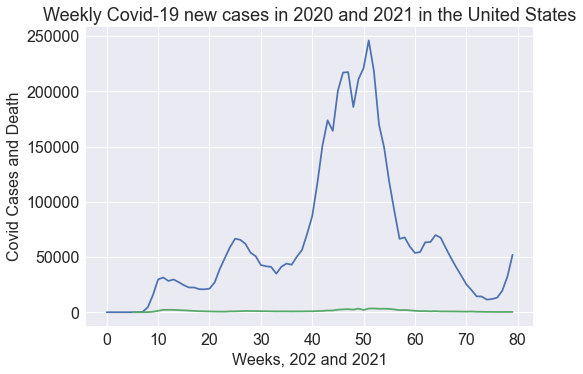

In [120]:
plt.plot(work.weekly_casesAverage)
plt.plot(work2.weekly_deathsAverage)
plt.title("Weekly Covid-19 new cases in 2020 and 2021 in the United States", fontsize=18)
plt.ylabel("Covid Cases and Death", fontsize=16)
plt.xlabel('Weeks, in 2020 and 2021', fontsize=16)
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=16)

;

In [121]:
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    print(header_row)

['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'new_vaccinations_smoothe

In [122]:
for index, column_header in enumerate(header_row):
    print(index, column_header)

0 iso_code
1 continent
2 location
3 date
4 total_cases
5 new_cases
6 new_cases_smoothed
7 total_deaths
8 new_deaths
9 new_deaths_smoothed
10 total_cases_per_million
11 new_cases_per_million
12 new_cases_smoothed_per_million
13 total_deaths_per_million
14 new_deaths_per_million
15 new_deaths_smoothed_per_million
16 reproduction_rate
17 icu_patients
18 icu_patients_per_million
19 hosp_patients
20 hosp_patients_per_million
21 weekly_icu_admissions
22 weekly_icu_admissions_per_million
23 weekly_hosp_admissions
24 weekly_hosp_admissions_per_million
25 new_tests
26 total_tests
27 total_tests_per_thousand
28 new_tests_per_thousand
29 new_tests_smoothed
30 new_tests_smoothed_per_thousand
31 positive_rate
32 tests_per_case
33 tests_units
34 total_vaccinations
35 people_vaccinated
36 people_fully_vaccinated
37 new_vaccinations
38 new_vaccinations_smoothed
39 total_vaccinations_per_hundred
40 people_vaccinated_per_hundred
41 people_fully_vaccinated_per_hundred
42 new_vaccinations_smoothed_per_mil

In [132]:
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    highs = []
    for row in reader:
        try:
            high = int(row[5])
        except ValueError:
            print(f"Missing data for {highs}")
        else:
            highs.append(high)
            print(highs)

Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []
Missing data for []


In [133]:
import json

In [141]:
filename = 'C:/Users/chero/Documents/covid/owid-covid-data.json'
with open(filename) as f:
    covid_data = json.load(f)

In [142]:
readable_file = 'C:/Users/chero/Documents/covid/readable_eq_data.json'
with open(readable_file, 'w') as f:
    json.dump(covid_data, f, indent=4)

In [204]:
covid_info = covid_data['AFG']
print(len(covid_info))

15


In [243]:
[i['total_cases'] for i in covid_info['data']]

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 4.0,
 4.0,
 4.0,
 4.0,
 5.0,
 7.0,
 8.0,
 11.0,
 12.0,
 13.0,
 15.0,
 16.0,
 18.0,
 20.0,
 24.0,
 25.0,
 29.0,
 30.0,
 34.0,
 41.0,
 43.0,
 76.0,
 80.0,
 91.0,
 107.0,
 118.0,
 146.0,
 175.0,
 197.0,
 240.0,
 275.0,
 300.0,
 338.0,
 368.0,
 424.0,
 445.0,
 485.0,
 532.0,
 556.0,
 608.0,
 666.0,
 715.0,
 785.0,
 841.0,
 907.0,
 934.0,
 997.0,
 1027.0,
 1093.0,
 1177.0,
 1236.0,
 1331.0,
 1464.0,
 1532.0,
 1704.0,
 1830.0,
 1940.0,
 2127.0,
 2291.0,
 2470.0,
 2705.0,
 2895.0,
 3225.0,
 3393.0,
 3564.0,
 3781.0,
 4042.0,
 4403.0,
 4687.0,
 4968.0,
 5227.0,
 5640.0,
 6054.0,
 6403.0,
 6665.0,
 7073.0,
 7654.0,
 8146.0,
 8677.0,
 9219.0,
 10001.0,
 10585.0,
 11176.0,
 11834.0,
 12459.0,
 13039.0,
 13662.0,
 14528.0,
 15208.0,
 15753.0,
 16512.0,
 17270.0,
 18057.0,
 18972.0,
 19554.0,
 20345.0,
 20920.0,
 21462.0,
 22146.0,
 22894.0,
 23550.0,
 24106.0,
 24770.0,
 25531.0,
 26314.0,
 26878.0,
 27536.0,
 27882.0,
 28428.0,
 28837.0,
 291

In [236]:
covid_info2 = covid_data['DZA']
print(len(covid_info2))

18


In [238]:
[i['total_cases'] for i in covid_info2['data']]

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 3.0,
 5.0,
 12.0,
 12.0,
 17.0,
 17.0,
 19.0,
 20.0,
 20.0,
 20.0,
 24.0,
 26.0,
 37.0,
 48.0,
 54.0,
 60.0,
 74.0,
 87.0,
 90.0,
 139.0,
 201.0,
 230.0,
 264.0,
 302.0,
 367.0,
 409.0,
 454.0,
 511.0,
 584.0,
 716.0,
 847.0,
 986.0,
 1171.0,
 1251.0,
 1320.0,
 1423.0,
 1468.0,
 1572.0,
 1666.0,
 1761.0,
 1825.0,
 1914.0,
 1983.0,
 2070.0,
 2160.0,
 2268.0,
 2418.0,
 2534.0,
 2629.0,
 2718.0,
 2811.0,
 2910.0,
 3007.0,
 3127.0,
 3256.0,
 3382.0,
 3517.0,
 3649.0,
 3848.0,
 4006.0,
 4154.0,
 4295.0,
 4474.0,
 4648.0,
 4838.0,
 4997.0,
 5182.0,
 5369.0,
 5558.0,
 5723.0,
 5891.0,
 6067.0,
 6253.0,
 6442.0,
 6629.0,
 6821.0,
 7019.0,
 7201.0,
 7377.0,
 7542.0,
 7728.0,
 7918.0,
 8113.0,
 8306.0,
 8503.0,
 8697.0,
 8857.0,
 8997.0,
 9134.0,
 9267.0,
 9394.0,
 9513.0,
 9626.0,
 9733.0,
 9831.0,
 9935.0,
 10050.0,
 10154.0,
 10265.0,
 10382.0,
 10484.0,
 10589.0,
 10698.0,
 10810.0,
 10919.0,
 11031.0,
 11147.0,
 11268.0,
 11385.0,
 11504.0,
 11631.0,
 11

In [239]:
cases=(143439,132875, 162155)

In [240]:
print(cases)

(143439, 132875, 162155)


In [244]:
loc =("AFG","DZA","AND")

In [245]:
print(loc)

('AFG', 'DZA', 'AND')


In [246]:
from plotly.graph_objs import Scattergeo, Layout


In [247]:
from plotly import offline


In [248]:
data = [Scattergeo(lon=loc)]


In [249]:
my_layout = Layout(title='Global Earthquakes')


In [250]:
fig = {'data': data, 'layout': my_layout}

In [219]:
offline.plot(fig, filename='global_earthquakes.html')

ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: ['data']

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['bar', 'barpolar', 'box', 'candlestick',
                     'carpet', 'choropleth', 'choroplethmapbox',
                     'cone', 'contour', 'contourcarpet',
                     'densitymapbox', 'funnel', 'funnelarea',
                     'heatmap', 'heatmapgl', 'histogram',
                     'histogram2d', 'histogram2dcontour', 'icicle',
                     'image', 'indicator', 'isosurface', 'mesh3d',
                     'ohlc', 'parcats', 'parcoords', 'pie',
                     'pointcloud', 'sankey', 'scatter',
                     'scatter3d', 'scattercarpet', 'scattergeo',
                     'scattergl', 'scattermapbox', 'scatterpolar',
                     'scatterpolargl', 'scatterternary', 'splom',
                     'streamtube', 'sunburst', 'surface', 'table',
                     'treemap', 'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

In [264]:
covid_info2 = covid_data['DZA']

In [294]:
covid_info3=covid_data['COL']

In [363]:
mags = []
mg=[i['total_cases'] for i in covid_info['data']][518]

mags.append(mg)
print(mags[:10])


[144285.0]


In [393]:
print(str(mags))

[144285.0]


In [365]:
data=mags

In [366]:
code=("AFG","COL","DZA")

In [394]:
mg=(144285)

In [401]:
data = [{
 'type': 'scattergeo',
 'locationmode': 'ISO-3',
    'marker': 
    {'size':[mg].
    'color':mg,}
},]

SyntaxError: invalid syntax (Temp/ipykernel_2296/1551612930.py, line 6)

In [396]:
my_layout = Layout(title='Total Cases and Deaths of Covid-19')


In [397]:
fig = {'data': data, 'layout': my_layout}

In [402]:
offline.plot(fig, filename='global_covi19.html')


'global_covi19.html'